In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import sqlalchemy
import seaborn as sns

In [2]:
try:
    conn = sql.connect("MIG_Cement_Records.db")
except Exception as e:
    print(e)

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [5]:
print(f"Table Name: {cursor.fetchall()}")

Table Name: [('Sites',), ('CementTypes',), ('Operations',)]


In [6]:
df1 = pd.read_sql_query('SELECT * FROM Sites', conn)
df2 = pd.read_sql_query('SELECT * FROM CementTypes', conn)
df3 = pd.read_sql_query('SELECT * FROM Operations', conn)
conn.close()

In [7]:
df1.head()
#df2.head()
#df3.head()

,site_id,region,silo_capacity,behavior
0,SITE_001,North,448,aggressive
1,SITE_002,South,288,conservative
2,SITE_003,East,314,aggressive
3,SITE_004,South,472,conservative
4,SITE_005,South,230,aggressive


In [8]:
df1.columns

Index(['site_id', 'region', 'silo_capacity', 'behavior'], dtype='object')

In [9]:
df2.columns

Index(['cement_type'], dtype='object')

In [10]:
df3.head()

,date,site_id,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity
0,2022-01-01,SITE_001,CEM_II,43.18,34.54,52.56,45.83,63.85,3.40,-3.10,448
1,2022-01-02,SITE_001,CEM_I,45.26,45.26,63.85,19.97,38.56,3.23,14.28,448
2,2022-01-03,SITE_001,CEM_III,38.69,38.69,38.56,47.19,47.06,2.64,6.40,448
3,2022-01-04,SITE_001,CEM_I,33.16,33.16,47.06,18.74,32.64,8.25,14.23,448
4,2022-01-05,SITE_001,CEM_III,56.88,47.04,32.64,14.40,0.00,2.69,8.97,448


In [11]:
df1.shape

(30, 4)

In [12]:
df2.shape

(3, 1)

In [13]:
df3.shape

(32880, 11)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   site_id        30 non-null     object
 1   region         30 non-null     object
 2   silo_capacity  30 non-null     int64 
 3   behavior       30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cement_type  3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


In [16]:
df3['date'] = pd.to_datetime(df3['date'])

In [17]:
df3['site_id'].unique()

array(['SITE_001', 'SITE_002', 'SITE_003', 'SITE_004', 'SITE_005',
       'SITE_006', 'SITE_007', 'SITE_008', 'SITE_009', 'SITE_010',
       'SITE_011', 'SITE_012', 'SITE_013', 'SITE_014', 'SITE_015',
       'SITE_016', 'SITE_017', 'SITE_018', 'SITE_019', 'SITE_020',
       'SITE_021', 'SITE_022', 'SITE_023', 'SITE_024', 'SITE_025',
       'SITE_026', 'SITE_027', 'SITE_028', 'SITE_029', 'SITE_030'],
      dtype=object)

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      32880 non-null  datetime64[ns]
 1   site_id                   32880 non-null  object        
 2   cement_type               32880 non-null  object        
 3   planned_pour_tonnes       32880 non-null  float64       
 4   consumed_tonnes           32880 non-null  float64       
 5   opening_inventory_tonnes  32880 non-null  float64       
 6   deliveries_tonnes         32880 non-null  float64       
 7   closing_inventory_tonnes  32880 non-null  float64       
 8   rain_mm                   32880 non-null  float64       
 9   avg_temp_c                32880 non-null  float64       
 10  silo_capacity             32880 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 2.8+ MB


In [19]:
df3['silo_capacity'].nunique()

27

In [20]:
df1.isnull().sum()

site_id          0
region           0
silo_capacity    0
behavior         0
dtype: int64

In [21]:
df2.isnull().sum()

cement_type    0
dtype: int64

In [22]:
df3.isnull().sum()

date                        0
site_id                     0
cement_type                 0
planned_pour_tonnes         0
consumed_tonnes             0
opening_inventory_tonnes    0
deliveries_tonnes           0
closing_inventory_tonnes    0
rain_mm                     0
avg_temp_c                  0
silo_capacity               0
dtype: int64

In [23]:
df3.columns

Index(['date', 'site_id', 'cement_type', 'planned_pour_tonnes',
       'consumed_tonnes', 'opening_inventory_tonnes', 'deliveries_tonnes',
       'closing_inventory_tonnes', 'rain_mm', 'avg_temp_c', 'silo_capacity'],
      dtype='object')

In [24]:
df1.dtypes

site_id          object
region           object
silo_capacity     int64
behavior         object
dtype: object

In [25]:
df2.dtypes

cement_type    object
dtype: object

In [26]:
df3.dtypes

date                        datetime64[ns]
site_id                             object
cement_type                         object
planned_pour_tonnes                float64
consumed_tonnes                    float64
opening_inventory_tonnes           float64
deliveries_tonnes                  float64
closing_inventory_tonnes           float64
rain_mm                            float64
avg_temp_c                         float64
silo_capacity                        int64
dtype: object

In [27]:
df1.isna().sum()

site_id          0
region           0
silo_capacity    0
behavior         0
dtype: int64

In [28]:
df1['site_id'] = df1['site_id'].astype('category')

In [29]:
df2.isna().sum()

cement_type    0
dtype: int64

In [30]:
df2['cement_type'] = df2['cement_type'].astype('category')

In [31]:
df2.duplicated().sum()

np.int64(0)

In [32]:
df3.isna().sum()

date                        0
site_id                     0
cement_type                 0
planned_pour_tonnes         0
consumed_tonnes             0
opening_inventory_tonnes    0
deliveries_tonnes           0
closing_inventory_tonnes    0
rain_mm                     0
avg_temp_c                  0
silo_capacity               0
dtype: int64

In [33]:
df3.duplicated().sum()

np.int64(0)

In [34]:
df3[['site_id','cement_type']] = df3[['site_id','cement_type']].astype('category')

In [35]:
df_merged = df3.merge(df1, on='site_id', how='left')

In [36]:
df_merged = df_merged.merge(df2, on='cement_type', how='left')

In [37]:
df_merged.tail()

,date,site_id,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity_x,region,silo_capacity_y,behavior
32875,2024-12-27,SITE_030,CEM_III,58.48,29.63,0.0,29.63,0.0,7.17,12.00,316,South,316,aggressive
32876,2024-12-28,SITE_030,CEM_I,45.39,22.35,0.0,22.35,0.0,2.13,8.04,316,South,316,aggressive
32877,2024-12-29,SITE_030,CEM_III,58.47,14.21,0.0,14.21,0.0,0.28,2.26,316,South,316,aggressive
32878,2024-12-30,SITE_030,CEM_II,59.58,10.65,0.0,10.65,0.0,4.58,9.55,316,South,316,aggressive
32879,2024-12-31,SITE_030,CEM_I,48.17,16.74,0.0,16.74,0.0,6.04,23.24,316,South,316,aggressive


In [38]:
df_merged.columns

Index(['date', 'site_id', 'cement_type', 'planned_pour_tonnes',
       'consumed_tonnes', 'opening_inventory_tonnes', 'deliveries_tonnes',
       'closing_inventory_tonnes', 'rain_mm', 'avg_temp_c', 'silo_capacity_x',
       'region', 'silo_capacity_y', 'behavior'],
      dtype='object')

In [39]:
df_merged.shape

(32880, 14)

In [40]:
df_merged.isnull().sum()

date                        0
site_id                     0
cement_type                 0
planned_pour_tonnes         0
consumed_tonnes             0
opening_inventory_tonnes    0
deliveries_tonnes           0
closing_inventory_tonnes    0
rain_mm                     0
avg_temp_c                  0
silo_capacity_x             0
region                      0
silo_capacity_y             0
behavior                    0
dtype: int64

In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      32880 non-null  datetime64[ns]
 1   site_id                   32880 non-null  category      
 2   cement_type               32880 non-null  category      
 3   planned_pour_tonnes       32880 non-null  float64       
 4   consumed_tonnes           32880 non-null  float64       
 5   opening_inventory_tonnes  32880 non-null  float64       
 6   deliveries_tonnes         32880 non-null  float64       
 7   closing_inventory_tonnes  32880 non-null  float64       
 8   rain_mm                   32880 non-null  float64       
 9   avg_temp_c                32880 non-null  float64       
 10  silo_capacity_x           32880 non-null  int64         
 11  region                    32880 non-null  object        
 12  silo_capacity_y   

In [42]:
df_merged[['silo_capacity_x','silo_capacity_y']].head()

,silo_capacity_x,silo_capacity_y
0,448,448
1,448,448
2,448,448
3,448,448
4,448,448


In [43]:
df_merged.drop('silo_capacity_y', axis=1, inplace=True)

In [44]:
df_merged.rename(columns={'silo_capacity_x': 'silo_capacity'}, inplace=True)

In [45]:
df_merged.head()

,date,site_id,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity,region,behavior
0,2022-01-01,SITE_001,CEM_II,43.18,34.54,52.56,45.83,63.85,3.40,-3.10,448,North,aggressive
1,2022-01-02,SITE_001,CEM_I,45.26,45.26,63.85,19.97,38.56,3.23,14.28,448,North,aggressive
2,2022-01-03,SITE_001,CEM_III,38.69,38.69,38.56,47.19,47.06,2.64,6.40,448,North,aggressive
3,2022-01-04,SITE_001,CEM_I,33.16,33.16,47.06,18.74,32.64,8.25,14.23,448,North,aggressive
4,2022-01-05,SITE_001,CEM_III,56.88,47.04,32.64,14.40,0.00,2.69,8.97,448,North,aggressive


In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      32880 non-null  datetime64[ns]
 1   site_id                   32880 non-null  category      
 2   cement_type               32880 non-null  category      
 3   planned_pour_tonnes       32880 non-null  float64       
 4   consumed_tonnes           32880 non-null  float64       
 5   opening_inventory_tonnes  32880 non-null  float64       
 6   deliveries_tonnes         32880 non-null  float64       
 7   closing_inventory_tonnes  32880 non-null  float64       
 8   rain_mm                   32880 non-null  float64       
 9   avg_temp_c                32880 non-null  float64       
 10  silo_capacity             32880 non-null  int64         
 11  region                    32880 non-null  object        
 12  behavior          

In [47]:
df_merged.columns

Index(['date', 'site_id', 'cement_type', 'planned_pour_tonnes',
       'consumed_tonnes', 'opening_inventory_tonnes', 'deliveries_tonnes',
       'closing_inventory_tonnes', 'rain_mm', 'avg_temp_c', 'silo_capacity',
       'region', 'behavior'],
      dtype='object')

In [48]:
df_merged.describe(include='category')

,site_id,cement_type
count,32880,32880
unique,30,3
top,SITE_001,CEM_II
freq,1096,11097


In [49]:
df_merged['region'].value_counts()

region
East     13152
South    12056
West      4384
North     3288
Name: count, dtype: int64

In [50]:
df_merged['cement_type'].value_counts()

cement_type
CEM_II     11097
CEM_I      10913
CEM_III    10870
Name: count, dtype: int64

In [51]:
import seaborn as sns

In [52]:
df_merged['planned_pour_tonnes'].dtypes

dtype('float64')

In [53]:
#sns.lineplot(x='date', y='planned_pour_tonnes', hue='site_id', data=df_merged)

In [54]:
#sns.heatmap(df_merged.corr(), annot=True)

In [55]:
numeric_col =  ['planned_pour_tonnes',
       'consumed_tonnes', 'opening_inventory_tonnes', 'deliveries_tonnes',
       'closing_inventory_tonnes', 'rain_mm', 'avg_temp_c']

In [56]:
(df_merged[numeric_col] < 0).sum()

planned_pour_tonnes            0
consumed_tonnes                0
opening_inventory_tonnes       0
deliveries_tonnes              0
closing_inventory_tonnes       0
rain_mm                        0
avg_temp_c                  4551
dtype: int64

In [57]:
df_merged['inventory_check'] = (df_merged['opening_inventory_tonnes'] + df_merged['deliveries_tonnes'] - df_merged['consumed_tonnes']).round(2) == df_merged['closing_inventory_tonnes'].round(2)

In [58]:
df_merged['inventory_check'].mean()

np.float64(0.999787104622871)

# KPI Analysis

In [59]:
df_merged['stockout'] = df_merged['planned_pour_tonnes'] > (df_merged['opening_inventory_tonnes'] + df_merged['deliveries_tonnes'])

In [60]:
df_merged['overcapacity'] = df_merged['closing_inventory_tonnes'] > df_merged['silo_capacity']

In [61]:
df_merged['idle'] = (df_merged['planned_pour_tonnes'] == 0) & (df_merged['deliveries_tonnes'] == 0)

In [62]:
df_merged['waste_risk'] = (df_merged['closing_inventory_tonnes'] > 0.85 * df_merged['silo_capacity']) & (df_merged['planned_pour_tonnes'] < 5)

In [63]:
df_merged['pour_disrupted'] = (df_merged['planned_pour_tonnes'] > 0) & (df_merged['consumed_tonnes'] == 0)

# KPI Summary

In [64]:
kpi_summary = df_merged.groupby('site_id').agg(
    total_days = ('date', 'count'),
    total_consumed_tonnes = ('consumed_tonnes', 'sum'),
    avg_daily_consumed = ('consumed_tonnes','mean'),
    stockout_pct = ('stockout', lambda x: round(x.mean() * 100, 2)),
    overcapacity_pct = ('overcapacity', lambda x: round(x.mean() * 100, 2)),
    idle_pct = ('idle', lambda x: round(x.mean() * 100, 2)),
    waste_risk_pct = ('pour_disrupted', lambda x: round(x.mean() * 100, 2)),
    silo_capacity = ('silo_capacity', 'first')
).reset_index()

/var/folders/g7/9205nqf15675vhtcpl9dwjv80000gn/T/ipykernel_1109/2591993760.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kpi_summary = df_merged.groupby('site_id').agg(


In [65]:
kpi_summary

,site_id,total_days,total_consumed_tonnes,avg_daily_consumed,stockout_pct,overcapacity_pct,idle_pct,waste_risk_pct,silo_capacity
0,SITE_001,1096,33056.40,30.160949,55.75,0.00,0.00,4.84,448
1,SITE_002,1096,12900.44,11.770474,0.00,98.81,0.00,0.00,288
2,SITE_003,1096,32520.09,29.671615,54.38,0.00,0.00,5.75,314
3,SITE_004,1096,12618.50,11.513230,0.00,98.08,0.00,0.00,472
4,SITE_005,1096,32935.68,30.050803,56.93,0.00,0.00,4.38,230
5,SITE_006,1096,28601.16,26.095949,16.15,0.00,2.55,3.47,443
6,SITE_007,1096,32607.65,29.751505,57.03,0.00,0.00,5.20,485
7,SITE_008,1096,32689.50,29.826186,60.49,0.00,0.00,4.47,260
8,SITE_009,1096,12735.31,11.619808,0.00,98.81,0.00,0.00,352
9,SITE_010,1096,33579.76,30.638467,57.03,0.00,0.00,4.56,158


# Exploratory Data Analysis

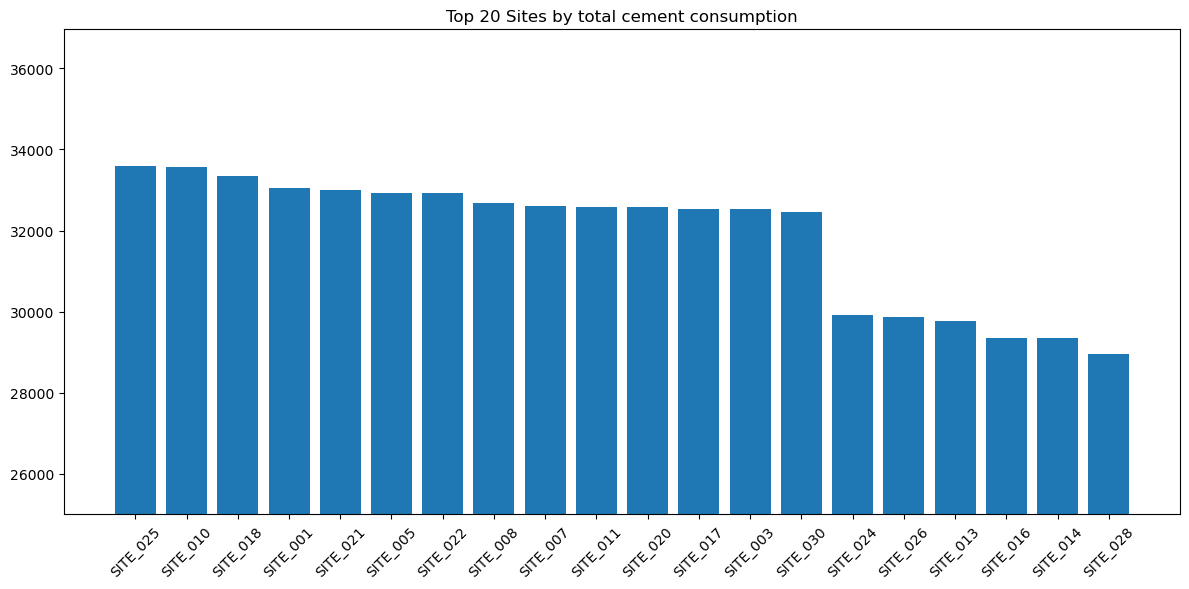

In [66]:
top_sites = kpi_summary.sort_values('total_consumed_tonnes', ascending = False).head(20)
plt.figure(figsize = (12,6))
plt.bar(top_sites['site_id'], top_sites['total_consumed_tonnes'])
plt.xticks(rotation=45)
plt.title('Top 20 Sites by total cement consumption')
plt.ylim(25000, top_sites['total_consumed_tonnes'].max() * 1.1)
plt.tight_layout()
plt.show()

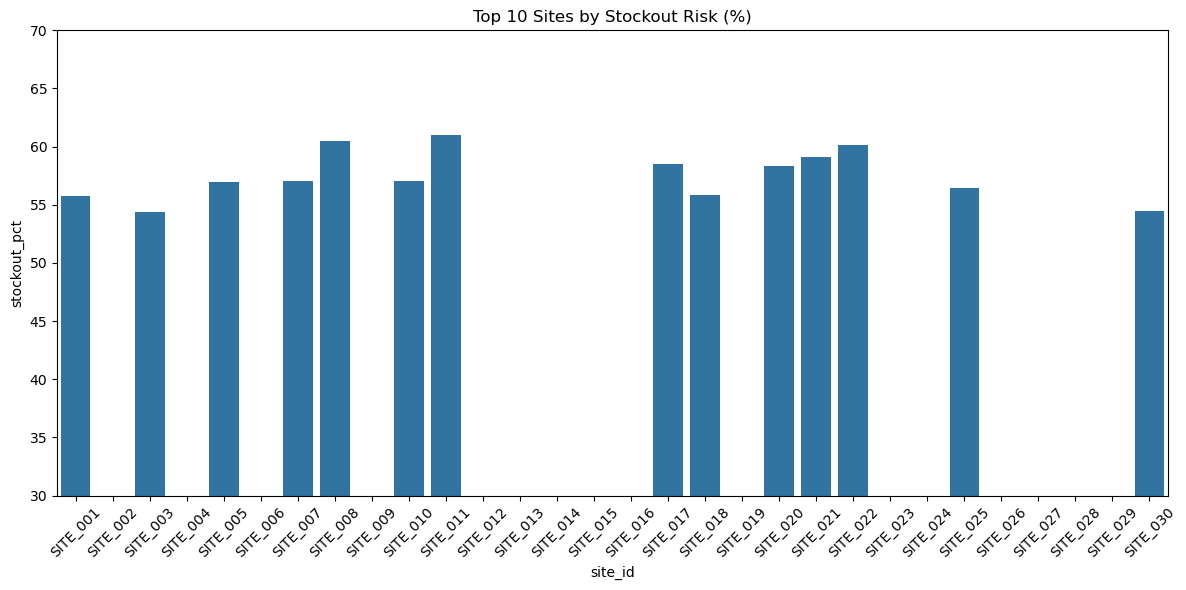

In [67]:
risk_sites = kpi_summary.sort_values('stockout_pct', ascending = False).head(20)
plt.figure(figsize = (12,6))
sns.barplot(x ='site_id', y='stockout_pct', data=risk_sites)
plt.xticks(rotation=45)
plt.title('Top 10 Sites by Stockout Risk (%)')
plt.ylim(30, 70)
plt.tight_layout()
plt.show()

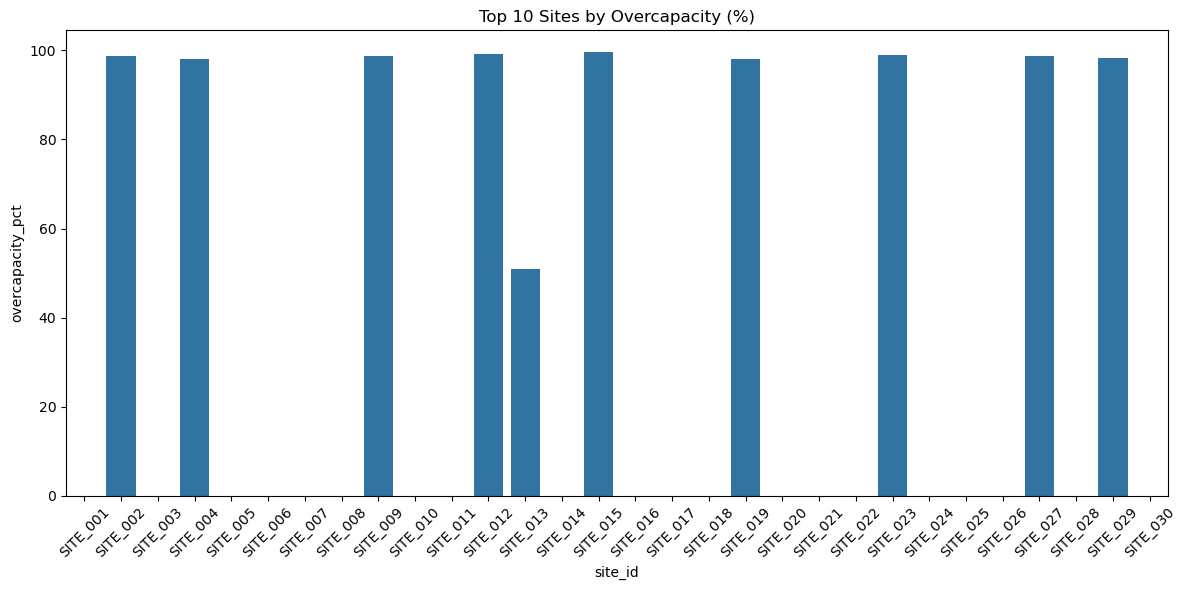

In [68]:
overcapacity_sites = kpi_summary.sort_values('overcapacity_pct', ascending = False).head(10)
plt.figure(figsize = (12,6))
sns.barplot(x ='site_id', y='overcapacity_pct', data = overcapacity_sites)
plt.xticks(rotation=45)
plt.title('Top 10 Sites by Overcapacity (%)')
#plt.ylim(30, 70)
plt.tight_layout()
plt.show()

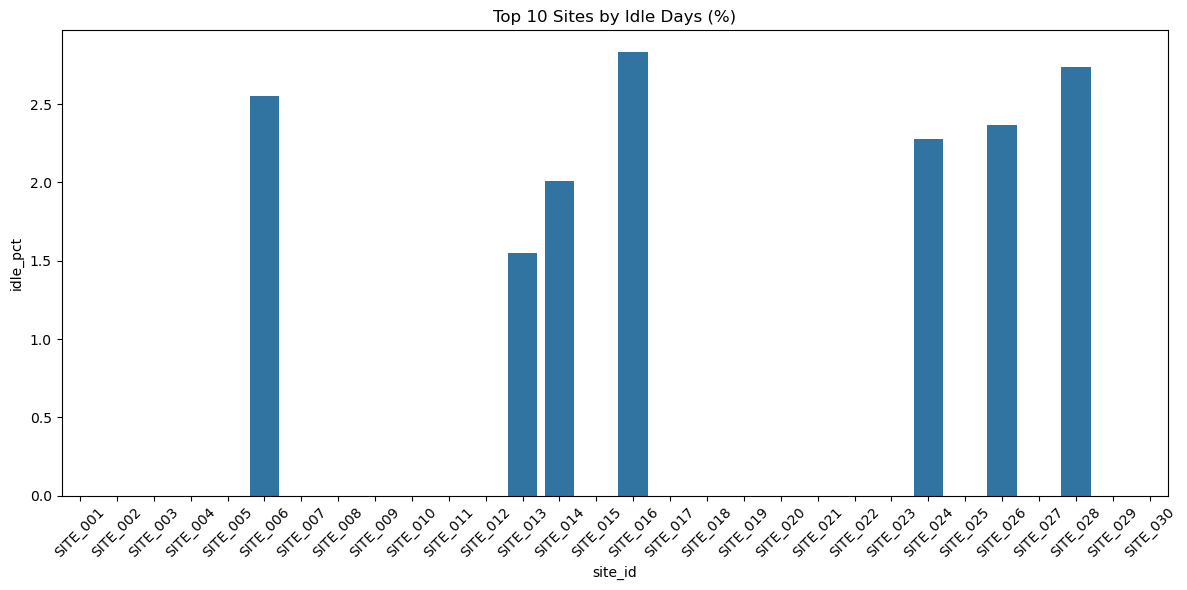

In [70]:
idle_sites = kpi_summary.sort_values('idle_pct', ascending = False).head(10)
plt.figure(figsize = (12,6))
sns.barplot(x ='site_id', y='idle_pct', data = idle_sites)
plt.xticks(rotation=45)
plt.title('Top 10 Sites by Idle Days (%)')
plt.tight_layout()
plt.show()

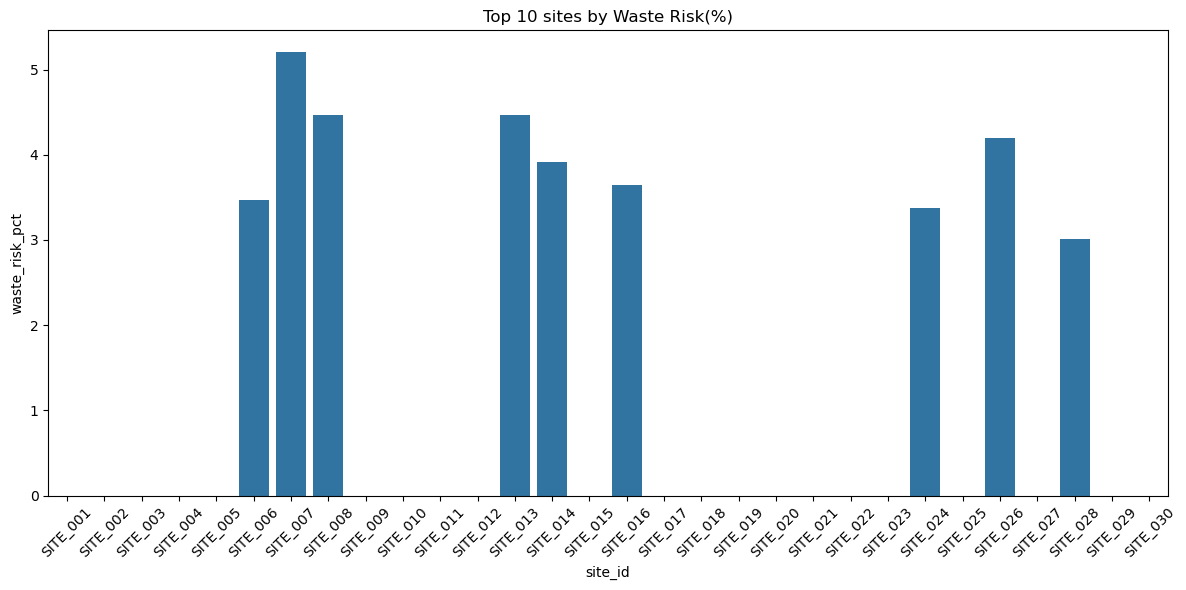

In [71]:
waste_risk_sites = kpi_summary.sort_values('idle_pct', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='site_id', y='waste_risk_pct', data=waste_risk_sites)
plt.xticks(rotation=45)
plt.title('Top 10 sites by Waste Risk(%)')
plt.tight_layout()
plt.show()

In [72]:
df_merged['utilization_pct'] = df_merged['closing_inventory_tonnes']/df_merged['silo_capacity']

In [73]:
utilization_summary = df_merged.groupby('site_id')['utilization_pct'].mean().sort_values()

/var/folders/g7/9205nqf15675vhtcpl9dwjv80000gn/T/ipykernel_1109/653621661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  utilization_summary = df_merged.groupby('site_id')['utilization_pct'].mean().sort_values()


<Axes: title={'center': 'Average Silo Utilization by Site'}, xlabel='site_id'>

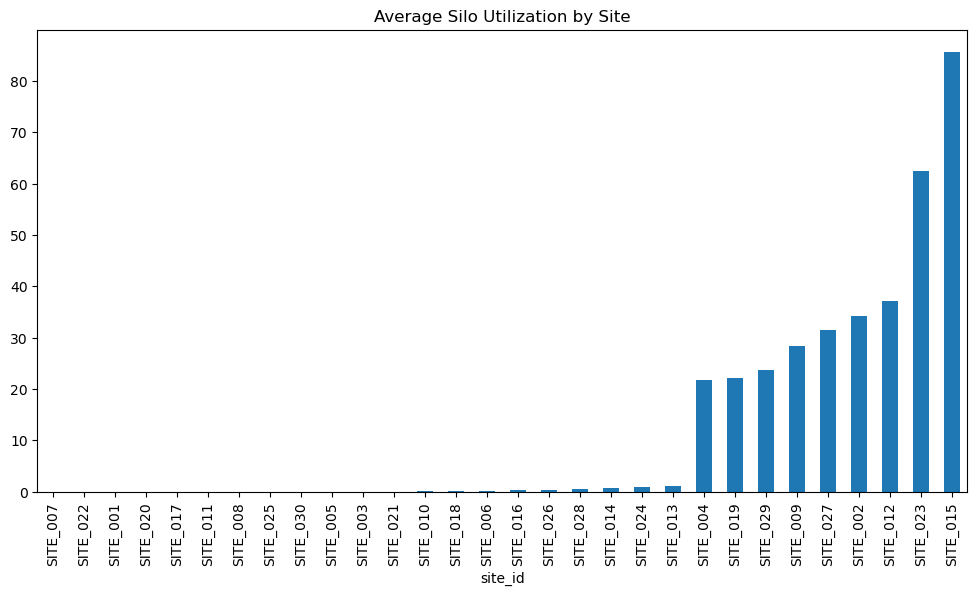

In [75]:
utilization_summary.plot(kind='bar', figsize=(12,6), title='Average Silo Utilization by Site')

In [77]:
behavior_kpi = df_merged.groupby('behavior').agg(
    avg_stockout = ('stockout', 'mean'),
    avg_overcapacity = ('overcapacity', 'mean'),
    avg_waste_risk = ('waste_risk', 'mean')

)

<Axes: title={'center': 'KPI Comparison by Site behavior'}, xlabel='behavior'>

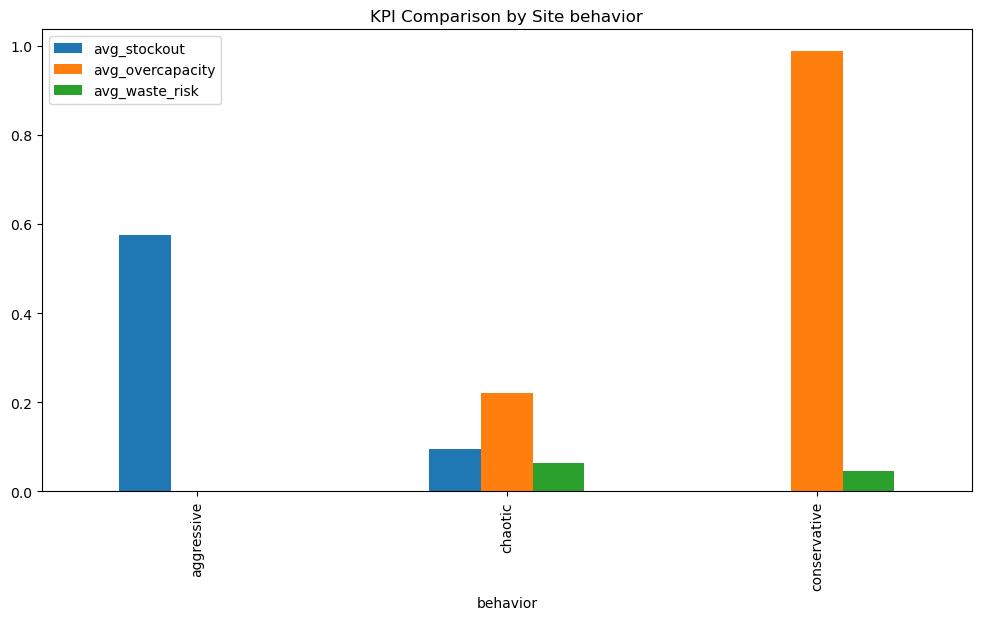

In [78]:
behavior_kpi.plot(kind='bar', figsize=(12,6), title= 'KPI Comparison by Site behavior')

In [79]:
site_usage = df_merged.groupby('site_id')['consumed_tonnes'].sum().sort_values(ascending=False)

/var/folders/g7/9205nqf15675vhtcpl9dwjv80000gn/T/ipykernel_1109/2001021496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  site_usage = df_merged.groupby('site_id')['consumed_tonnes'].sum().sort_values(ascending=False)


In [80]:
total_usage = site_usage.sum()
top5 = site_usage.head()
top5_share = round(top5.sum()/total_usage * 100, 2)

In [81]:
display(top5)
display(top5_share)


site_id
SITE_025    33604.06
SITE_010    33579.76
SITE_018    33348.09
SITE_001    33056.40
SITE_021    33009.68
Name: consumed_tonnes, dtype: float64

np.float64(21.36)